# Deep learning with keras : Introduction

Keras is a high level framework for doing deep learning and is based on tensorflow. It is very to use and allows to build standard neural networks. It allows has utilities to load standard dataset like mnist. 

The (not so good) documentation can be found at https://keras.io/


In [10]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt

Check how you can download and Load the MNIST dataset with keras. What is the type of the variables returned by keras? 

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 46s 4us/step


In [32]:
type(x_train)
x_train[0].shape

(28, 28)

Display one image or two of the MNIST dataset once it is loaded with opencv, matplotlib or skimage. 

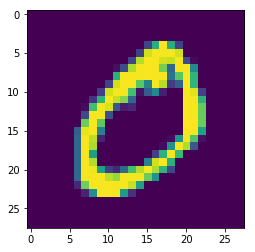

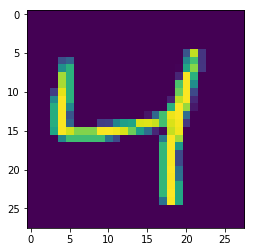

In [20]:
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[2])
plt.show()

We will now build our first Neural network ! For that we will use what is called the sequential API of Keras. Import the Sequential module, and the Dense, Convolutional and Flatten Layers as well.

In [21]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D

Before building the network we will try to instanciate a convolutional layer. What is the kernel size ? What is the activation function ? 

In [23]:
convLayer = Convolution2D(128, kernel_size=(3,3))

Do the same with the Dense layers.

In [ ]:
denseLayer = Dense(65, activation="relu")

Now we build the model for real. Instantiate the Sequential class and put the object in the variable **model**.

In [35]:
model = Sequential()
model.add(convLayer)
model.add(Convolution2D(128, kernel_size=(3,3)))
model.add(Flatten())
model.add(denseLayer)
model.add(Dense(400, activation="softmax"))

model.compile(optimizer="SGD", 
             loss = "sparse_categorical_crossentropy")

In [36]:
model.fit(x_train, y_train)

ValueError: Input 0 is incompatible with layer conv2d_1: expected ndim=4, found ndim=3

Add One Convolutional layer, A Flatten layer  and two Dense layer in the model with the method `add`. Put at the last layer the activation function softmax. 

Use the compile method on your model. What arguments does it require ? What is an optimiser ? What is a loss ? 

Train the model on the train data. You can specify the validation argument. Is the performance good ? 

Add more convolutional layer and more Dense layers. What happens ? Does it improve the model ?

If not try to normalise your images